<a href="https://colab.research.google.com/github/ppkgtmm/sentiment/blob/main/EDA_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import re
import nltk

In [2]:
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
cols = ['text', 'target']

## Read data
#### column description
1. text : review text
2. target : polarity of review
    
    * 0 : negative
    * 1 : positive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/sentiment/data/train.csv')[cols]
data.sample(5)

,text,target
2443849,"very sharp!: These are great knives, but be ca...",1
184337,The book reminds me to cherish the rare gift o...,1
993431,Technical Problems with no technical solutions...,0
636335,Works well....: I purchased this particular br...,1
1930226,Powerful album for die hard or new Styx fans: ...,1


## EDA

In [37]:
data.isnull().any()

text      False
target    False
dtype: bool

In [7]:
target_dist = data.groupby('target').count().reset_index()
target_dist['proportion'] = target_dist['text'] / sum(list(target_dist['text']))
target_dist

,target,text,proportion
0,0,1800000,0.5
1,1,1800000,0.5


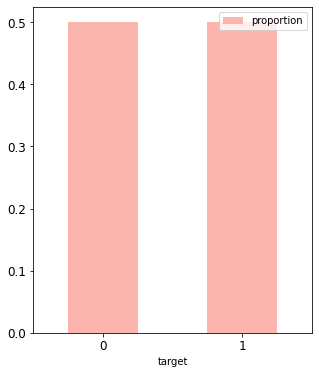

In [35]:
target_dist.plot(x='target', y='proportion', kind='bar', rot=0, \
                 colormap='Pastel1', fontsize=12, figsize=(5,6))

In [38]:
copy = data.copy()
copy['word_count'] = copy['text'].apply(lambda x: len(x.split(' ')))

In [39]:
def avg_word_length(text):
    words = text.split(' ')
    length = [len(w) for w in words]
    return math.ceil(sum(length) / len(length))

copy['avg_word_length'] = copy['text'].apply(avg_word_length)

In [40]:
copy.head(5)

,text,target,word_count,avg_word_length
0,Stuning even for the non-gamer: This sound tra...,1,80,5
1,The best soundtrack ever to anything.: I'm rea...,1,97,5
2,Amazing!: This soundtrack is my favorite music...,1,129,5
3,Excellent Soundtrack: I truly like this soundt...,1,118,6
4,"Remember, Pull Your Jaw Off The Floor After He...",1,87,5


In [41]:
copy.describe()

,target,word_count,avg_word_length
count,3600000.0,3.600000e+06,3.600000e+06
mean,0.5,7.848274e+01,5.030930e+00
std,0.5,4.283281e+01,5.250876e-01
min,0.0,2.000000e+00,2.000000e+00
25%,0.0,4.200000e+01,5.000000e+00
50%,0.5,7.000000e+01,5.000000e+00
75%,1.0,1.080000e+02,5.000000e+00
max,1.0,2.570000e+02,1.540000e+02


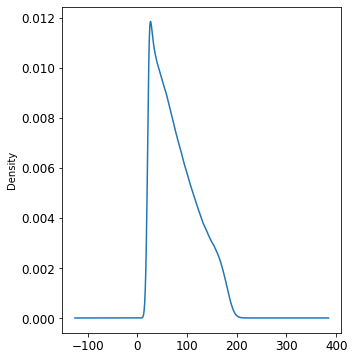

In [46]:
copy.word_count.plot(kind='kde', fontsize=12, figsize=(5,6))